In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Preprocessed
!ls

[Errno 2] No such file or directory: '/content/drive/MyDrive/Preprocessed'
/content
sample_data


In [ ]:
listOfProjati = []
ProjatiDirectory = {}
import os
path = os.getcwd()
for dir in os.listdir(path):
  if os.path.isdir(dir):
    if str(dir) != "thai banana mango (renamed)" and str(dir) != "Jubair":
      listOfProjati.append(str(dir))
      ProjatiDirectory[str(dir)] = '/' + str(dir)
ProjatiDirectory

{'.config': '/.config', 'sample_data': '/sample_data'}

In [ ]:
countDict = {}
for projati in listOfProjati:
  subfolderPath = path + ProjatiDirectory[projati]
  c = 0
  for file in os.listdir(subfolderPath):
    if file.endswith('.jpg') or file.endswith('.JPG') or file.endswith('.jpeg') or file.endswith('.JPEG') or file.endswith('.png') or file.endswith('.PNG'):
      # file_name, file_extension = os.path.splitext(file)
      c += 1
  countDict[projati] = c
countDict

{'Lengra': 366,
 'Fazlee': 600,
 'Haribhanga': 600,
 'Thai Banana Mango': 612,
 'Bari 7': 600,
 'Bari 11': 600,
 'Bari 4': 600,
 'Bari 8': 600,
 'African Jambo': 600,
 'Sabira': 624,
 'Phillipine Honey Dew': 708,
 'Maryam': 1044,
 'Indian Totapori': 726,
 'Kacha Mitha': 846,
 'Thai Moryam': 882,
 'Modhurani': 600,
 'Baper Bari': 600,
 'Red Palmar': 414,
 'King Breunei': 612,
 'Taiwani Red': 354,
 'Qzai': 810,
 'Him Sagor': 438,
 'Gopal Vog': 600,
 'Bari 13': 510,
 'Aprupali': 600,
 'Bari 9': 600}

In [ ]:
c = 0
for aam in countDict:
  c += countDict[aam]
c

16146

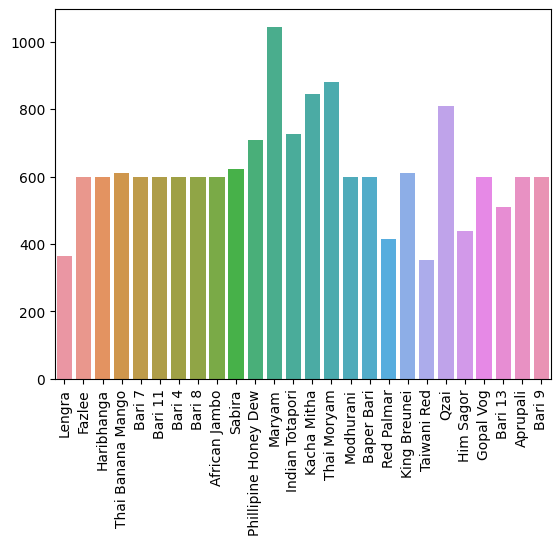

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=list(countDict.keys()), y=list(countDict.values()))
plt.xticks(rotation=90)
plt.show()

In [ ]:
''' import cv2
import numpy as np
img_data_array=[]
IMG_HEIGHT, IMG_WIDTH = 64, 64
for projati in listOfProjati:
  for file in os.listdir(path + ProjatiDirectory[projati]):
    if file.endswith('.jpg') or file.endswith('.JPG') or file.endswith('.jpeg') or file.endswith('.JPEG') or file.endswith('.png') or file.endswith('.PNG'):
      image_path= os.path.join(str(path + ProjatiDirectory[projati]),  file)
      image = cv2.imread(image_path)
      try:
        image = cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
      except:
        print("failed", projati, file)
      image = np.array(image)
      image = image.astype('float32')
      image /= 255.0
      img_data_array.append(image)
img_data_array '''

# Part 2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
import random
%matplotlib inline

In [ ]:
%cd /content/drive/MyDrive/Preprocessed
!ls

/content/drive/MyDrive/Preprocessed
'African Jambo'   Fazlee	      Maryam
 Aprupali	 'Gopal Vog'	      Modhurani
'Baper Bari'	  Haribhanga	     'Phillipine Honey Dew'
'Bari 11'	 'Him Sagor'	      Qzai
'Bari 13'	  image_data_pp.npy  'Red Palmar'
'Bari 4'	 'Indian Totapori'    Sabira
'Bari 7'	 'Kacha Mitha'	     'Taiwani Red'
'Bari 8'	 'King Breunei'      'Thai Banana Mango'
'Bari 9'	  Lengra	     'Thai Moryam'


In [ ]:
img_data=np.load('image_data_pp.npy')
img_data

array([[[[0.64705884, 0.6431373 , 0.654902  ],
         [0.64705884, 0.6431373 , 0.65882355],
         [0.64705884, 0.6431373 , 0.65882355],
         ...,
         [0.7921569 , 0.8156863 , 0.80784315],
         [0.79607844, 0.8117647 , 0.80784315],
         [0.8       , 0.8117647 , 0.8117647 ]],

        [[0.6431373 , 0.6392157 , 0.64705884],
         [0.6431373 , 0.6392157 , 0.654902  ],
         [0.6431373 , 0.6392157 , 0.654902  ],
         ...,
         [0.8       , 0.8117647 , 0.80784315],
         [0.8039216 , 0.8117647 , 0.80784315],
         [0.8039216 , 0.8117647 , 0.8117647 ]],

        [[0.6431373 , 0.6392157 , 0.6509804 ],
         [0.64705884, 0.6431373 , 0.654902  ],
         [0.6431373 , 0.6392157 , 0.654902  ],
         ...,
         [0.8       , 0.8117647 , 0.8039216 ],
         [0.8039216 , 0.8156863 , 0.80784315],
         [0.8       , 0.8117647 , 0.80784315]],

        ...,

        [[0.7882353 , 0.78039217, 0.78039217],
         [0.7921569 , 0.78431374, 0.78431374]

In [ ]:
import gc
gc.collect()

54

In [ ]:
listOfProjatiCopy = listOfProjati.copy()
listOfProjatiCopy

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(listOfProjatiCopy)
listOfProjatiCopy = le.transform(listOfProjatiCopy)
listOfProjatiCopy

array([16,  9, 11, 24,  6,  3,  5,  7,  0, 22, 19, 17, 13, 14, 25, 18,  2,
       21, 15, 23, 20, 12, 10,  4,  1,  8])

In [ ]:
target_val = []
for i in range(len(listOfProjati)):
  tempList = [listOfProjatiCopy[i]]*countDict[listOfProjati[i]]
  target_val.extend(tempList)
target_val = np.array(target_val)
target_val

array([16, 16, 16, ...,  8,  8,  8])

In [ ]:
target_val.size

16146

In [ ]:
from sklearn.model_selection import train_test_split
x, x_test, y, y_test = train_test_split(img_data,target_val,test_size=0.3, stratify=target_val)
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size = 0.2, stratify=y)

In [ ]:
print((x_train.shape,y_train.shape))
print((x_test.shape,y_test.shape))
print((x_val.shape,y_val.shape))

((9041, 128, 128, 3), (9041,))
((4844, 128, 128, 3), (4844,))
((2261, 128, 128, 3), (2261,))


In [ ]:
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

In [ ]:
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((9041, 128, 128, 3), (9041, 26))
((2261, 128, 128, 3), (2261, 26))
((4844, 128, 128, 3), (4844, 26))


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator()
val_generator = ImageDataGenerator()
test_generator = ImageDataGenerator()
train_generator.fit(x_train)
val_generator.fit(x_val)
test_generator.fit(x_test)

# VGG 16

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix
from keras import Sequential
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD,Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten, Dense, BatchNormalization, Activation,Dropout

In [ ]:
base_model_VGG16 = VGG16(include_top=False, weights='imagenet', input_shape=(128,128,3), classes=y_train.shape[1])

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
len(listOfProjati)

26

In [ ]:
model_vgg16 = Sequential()
model_vgg16.add(base_model_VGG16)
model_vgg16.add(Flatten())
model_vgg16.add(Dense(1024,activation=('relu')))
model_vgg16.add(Dense(512,activation=('relu')))
model_vgg16.add(Dense(256,activation=('relu')))
model_vgg16.add(Dropout(.3))
model_vgg16.add(Dense(128,activation=('relu')))
model_vgg16.add(Dropout(.2))
model_vgg16.add(Dense(26,activation=('softmax')))

In [ ]:
model_vgg16.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 1024)              8389632   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               3

In [ ]:
batch_size= 27
epochs=30
learning_rate=.001
sgd=SGD(learning_rate,momentum=.9,nesterov=False)

In [ ]:
model_vgg16.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
lrr= ReduceLROnPlateau(monitor='val_accuracy', factor=.01,  patience=3, min_lr=1e-5)

In [ ]:
hist = model_vgg16.fit(train_generator.flow(x_train, y_train, batch_size = batch_size),
                       epochs=epochs, steps_per_epoch = x_train.shape[0]//batch_size, validation_data = val_generator.flow(x_val, y_val, batch_size = batch_size),
                       callbacks = [lrr], verbose = 1)

Epoch 1/30
334/334 [==============================] - 169s 170ms/step - loss: 2.4183 - accuracy: 0.3147 - val_loss: 1.6202 - val_accuracy: 0.5595 - lr: 0.0010
Epoch 2/30
334/334 [==============================] - 51s 154ms/step - loss: 1.2627 - accuracy: 0.6332 - val_loss: 0.8378 - val_accuracy: 0.7421 - lr: 0.0010
Epoch 3/30
334/334 [==============================] - 52s 154ms/step - loss: 0.7962 - accuracy: 0.7665 - val_loss: 0.6219 - val_accuracy: 0.8120 - lr: 0.0010
Epoch 4/30
334/334 [==============================] - 52s 155ms/step - loss: 0.5411 - accuracy: 0.8418 - val_loss: 0.3721 - val_accuracy: 0.8868 - lr: 0.0010
Epoch 5/30
334/334 [==============================] - 51s 153ms/step - loss: 0.3380 - accuracy: 0.8972 - val_loss: 0.3222 - val_accuracy: 0.9084 - lr: 0.0010
Epoch 6/30
334/334 [==============================] - 52s 155ms/step - loss: 0.2438 - accuracy: 0.9248 - val_loss: 0.2300 - val_accuracy: 0.9257 - lr: 0.0010
Epoch 7/30
334/334 [==============================]

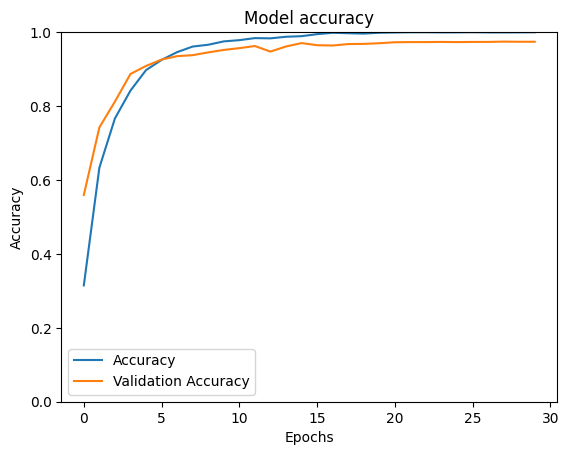

In [ ]:
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.ylim(0,1)
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()

In [ ]:
from keras.utils import to_categorical

# Assuming y_train contains the integer labels
y_train_one_hot = to_categorical(y_train, num_classes=26)  # Replace 31 with the number of classes


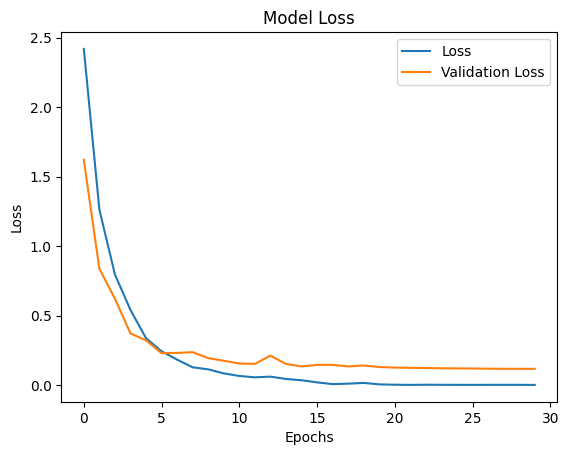

In [ ]:
plt.plot(hist.history["loss"])
plt.plot(hist.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["Loss","Validation Loss"])
plt.show()

In [ ]:
y_pred1 = model_vgg16.predict(x_test)
y_true = np.argmax(y_pred1,axis=1)
y_demo = np.argmax(y_test,axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_demo)

NameError: ignored

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_true, y_demo, average='weighted')

0.11028780454973752

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_true,y_demo,average='weighted')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.06125

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_true,y_demo,average='weighted')

0.5640098392461198

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_demo)

In [ ]:
# #Plotting the confusion matrix
# import seaborn as sns
# import matplotlib.pyplot as plt
# plt.figure(figsize=(5,4))
# sns.heatmap(cm, annot=True)
# plt.title('Confusion Matrix')
# plt.ylabel('Actal Values')
# plt.xlabel('Predicted Values')
# plt.show()

SyntaxError: ignored